In [2]:
# First, let's reload the data with proper analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Load the data
shale_gas = pd.read_csv('newdata.csv')

print("Dataset shape:", shale_gas.shape)
print("\nDataset columns:")
print(shale_gas.columns.tolist())
print("\nFirst 5 rows:")
print(shale_gas.head())
print("\nData types:")
print(shale_gas.dtypes)
print("\nBasic statistics:")
print(shale_gas.describe())

Dataset shape: (506, 15)

Dataset columns:
['Stage Spacing', 'bbl/ft', 'Well Spacing', 'Dip', 'Thickness', 'Lateral Length', 'Injection Rate', 'Porosity', 'ISIP', 'Water Saturation', 'Percentage of LG', 'Pressure Gradient', 'Proppant Loading', 'EUR', 'Category']

First 5 rows:
   Stage Spacing  bbl/ft  Well Spacing  Dip  Thickness  Lateral Length  \
0            140      38           850    0        165            8543   
1            140      30           900    0        174            8336   
2            140      30           900    0        174            9361   
3            140      30           950    0        175            9110   
4            140      30           950    0        175            9310   

   Injection Rate  Porosity  ISIP  Water Saturation  Percentage of LG  \
0              64       8.3  8200              17.1              38.0   
1              60       7.8  8061              16.0              59.3   
2              65       7.8  8061              16.0       

In [14]:
# Check for missing values
print("\nMissing values:")
print(shale_gas.isnull().sum())

# Check class distribution in Category
print("\nCategory distribution:")
print(shale_gas['Category'].value_counts())
print("\nCategory proportions:")
print(shale_gas['Category'].value_counts(normalize=True))

# Enhanced EDA function
def detailed_eda(df):
    print("="*80)
    print("ENHANCED EXPLORATORY DATA ANALYSIS")
    print("="*80)
    
    # 1. Target variable analysis
    print("\n1. TARGET VARIABLE (EUR) ANALYSIS:")
    print("-" * 40)
    print(f"Mean EUR: {df['EUR'].mean():.2f}")
    print(f"Median EUR: {df['EUR'].median():.2f}")
    print(f"Std EUR: {df['EUR'].std():.2f}")
    print(f"Min EUR: {df['EUR'].min():.2f}")
    print(f"Max EUR: {df['EUR'].max():.2f}")
    print(f"Range EUR: {df['EUR'].max() - df['EUR'].min():.2f}")
    


Missing values:
Stage Spacing        0
bbl/ft               0
Well Spacing         0
Dip                  0
Thickness            0
Lateral Length       0
Injection Rate       0
Porosity             0
ISIP                 0
Water Saturation     0
Percentage of LG     0
Pressure Gradient    0
Proppant Loading     0
EUR                  0
Category             0
dtype: int64

Category distribution:
Category
New_Design    262
Vintage       244
Name: count, dtype: int64

Category proportions:
Category
New_Design    0.517787
Vintage       0.482213
Name: proportion, dtype: float64


EXPLORATORY DATA ANALYSIS - SHALE GAS WELLS

1. BASIC DATASET INFO:
----------------------------------------
Shape: (506, 15)

Data types:
int64      9
float64    5
object     1
Name: count, dtype: int64

Missing values:
Stage Spacing        0
bbl/ft               0
Well Spacing         0
Dip                  0
Thickness            0
Lateral Length       0
Injection Rate       0
Porosity             0
ISIP                 0
Water Saturation     0
Percentage of LG     0
Pressure Gradient    0
Proppant Loading     0
EUR                  0
Category             0
dtype: int64

Category distribution:
Category
New_Design    262
Vintage       244
Name: count, dtype: int64

2. TOP CORRELATIONS WITH EUR:
----------------------------------------

Top 10 positive correlations:
Proppant Loading    :   0.738
Lateral Length      :   0.695
Porosity            :   0.478
Thickness           :   0.427
ISIP                :   0.381
Injection Rate      :   0.378
bbl/ft              :   0.360
Pressure Grad

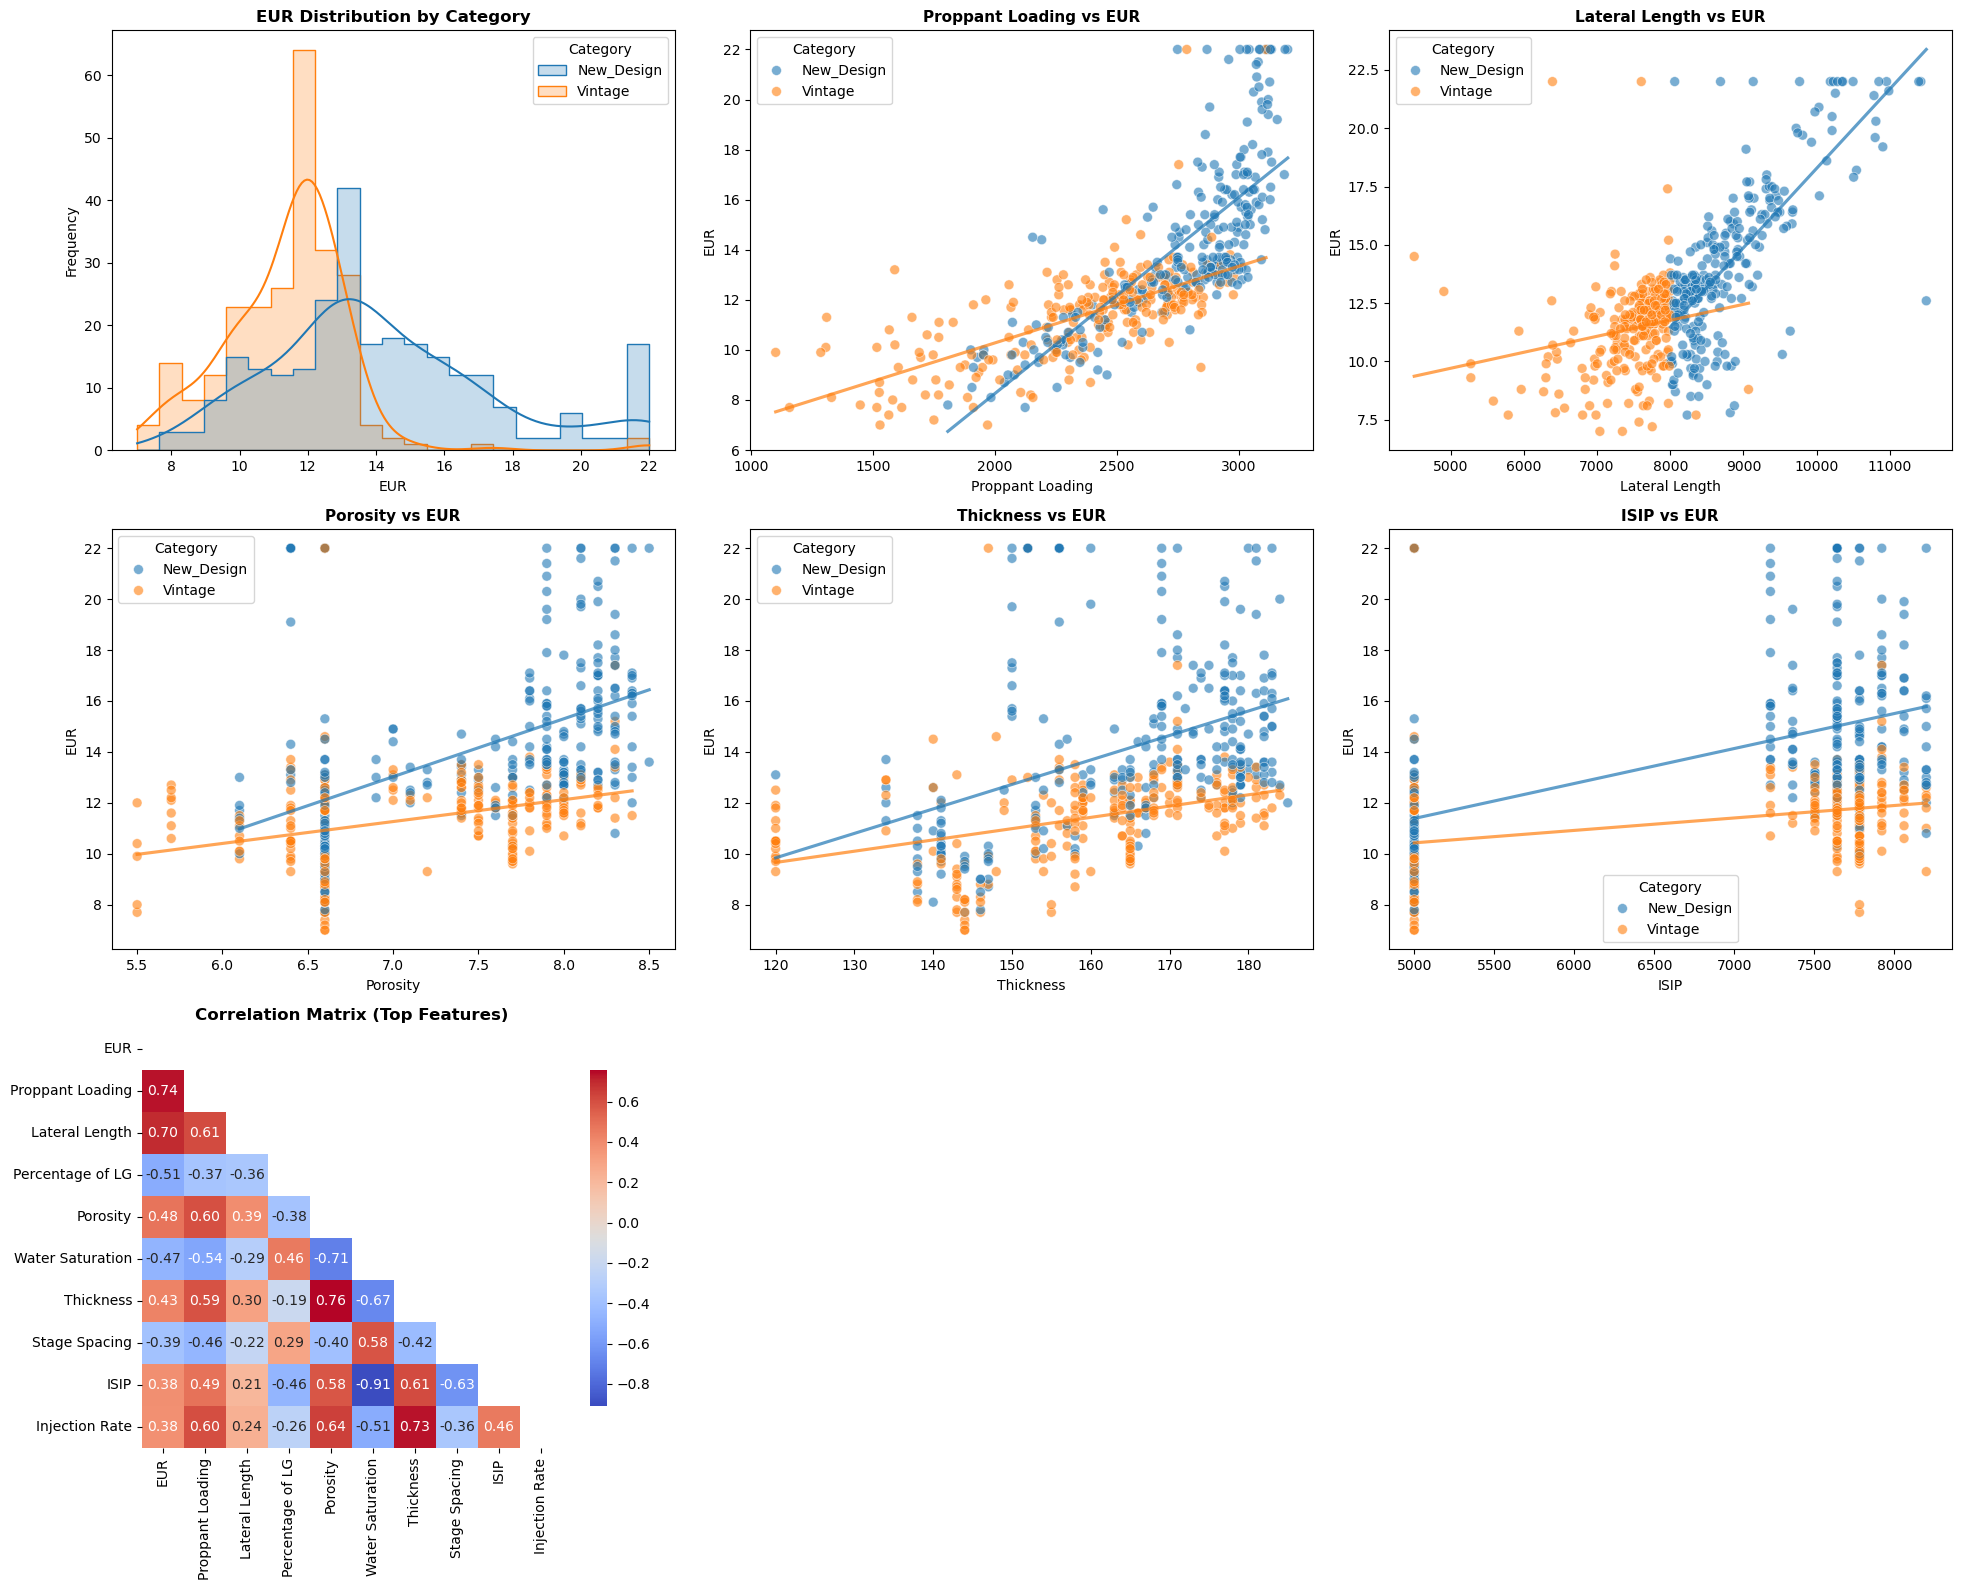

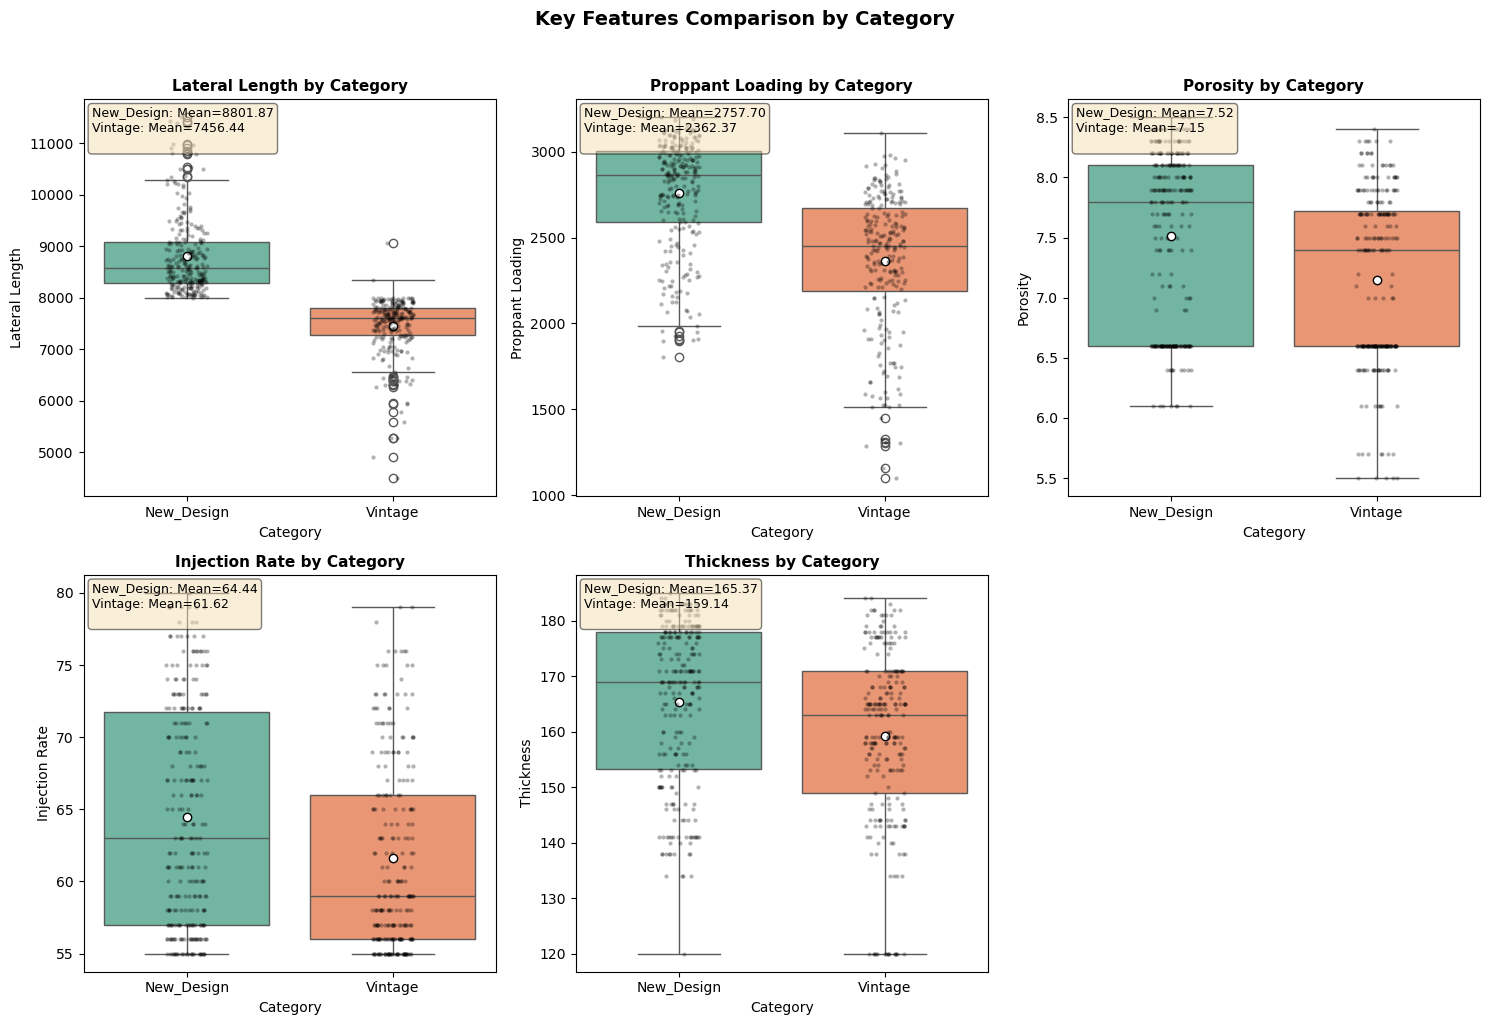

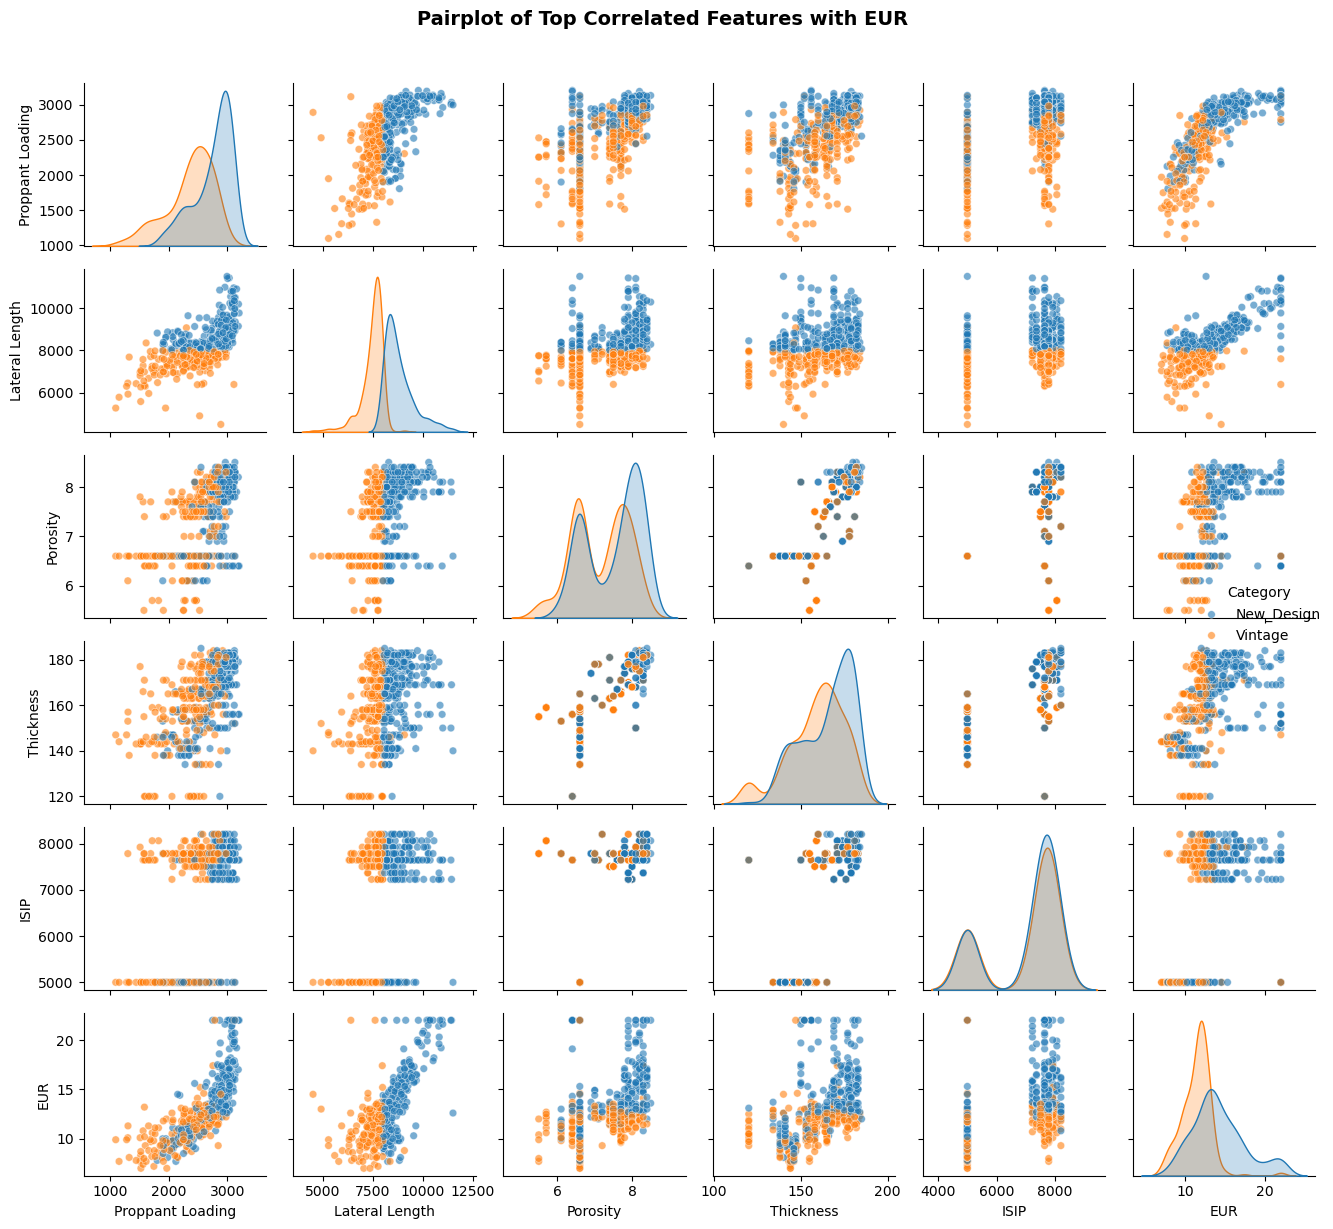


SUMMARY STATISTICS

Total wells analyzed: 506
New_Design wells: 262
Vintage wells: 244

EUR Statistics:
Overall mean EUR: 12.85
New_Design mean EUR: 14.20
Vintage mean EUR: 11.39


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming shale_gas DataFrame is already loaded

def detailed_eda(df):
    """Perform detailed exploratory data analysis on shale gas data"""
    
    print("=" * 60)
    print("EXPLORATORY DATA ANALYSIS - SHALE GAS WELLS")
    print("=" * 60)
    
    # 1. Basic statistics
    print("\n1. BASIC DATASET INFO:")
    print("-" * 40)
    print(f"Shape: {df.shape}")
    print(f"\nData types:")
    print(df.dtypes.value_counts())
    print(f"\nMissing values:")
    print(df.isnull().sum())
    print(f"\nCategory distribution:")
    print(df['Category'].value_counts())
    
    # 2. Correlation with EUR
    print("\n2. TOP CORRELATIONS WITH EUR:")
    print("-" * 40)
    
    # Select only numeric columns for correlation
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Check if EUR exists in numeric columns
    if 'EUR' not in numeric_df.columns:
        print("Warning: 'EUR' column not found in numeric data!")
        return None, None
    
    corr_matrix = numeric_df.corr()
    eur_corr = corr_matrix['EUR'].sort_values(ascending=False)
    
    print("\nTop 10 positive correlations:")
    for feature, corr in eur_corr.head(11).items():  # 11 to include EUR itself
        if feature != 'EUR':
            print(f"{feature:20s}: {corr:7.3f}")
    
    print("\nTop 10 negative correlations:")
    for feature, corr in eur_corr.tail(10).items():
        print(f"{feature:20s}: {corr:7.3f}")
    
    # 3. Feature analysis by category
    print("\n3. FEATURE COMPARISON BY CATEGORY:")
    print("-" * 40)
    
    # Get numeric columns excluding EUR
    numeric_features = [col for col in numeric_df.columns if col != 'EUR']
    
    # Create a summary DataFrame for category comparisons
    category_stats = []
    for col in numeric_features[:10]:  # Limit to first 10 features for readability
        new_design_data = df[df['Category'] == 'New_Design'][col]
        vintage_data = df[df['Category'] == 'Vintage'][col]
        
        new_design_mean = new_design_data.mean()
        vintage_mean = vintage_data.mean()
        diff = new_design_mean - vintage_mean
        pct_diff = (diff / vintage_mean * 100) if vintage_mean != 0 else 0
        
        print(f"{col:20s}: New Design={new_design_mean:7.2f}, "
              f"Vintage={vintage_mean:7.2f}, "
              f"Diff={diff:7.2f} ({pct_diff:5.1f}%)")
        
        category_stats.append({
            'Feature': col,
            'New_Design_Mean': new_design_mean,
            'Vintage_Mean': vintage_mean,
            'Absolute_Diff': diff,
            'Percent_Diff': pct_diff
        })
    
    return corr_matrix, pd.DataFrame(category_stats)


# Execute EDA function - pass shale_gas DataFrame as argument
corr_matrix, category_stats_df = detailed_eda(shale_gas)

# Visualizations
if corr_matrix is not None:
    plt.figure(figsize=(20, 16))

    # 1. EUR distribution
    plt.subplot(3, 3, 1)
    sns.histplot(data=shale_gas, x='EUR', hue='Category', kde=True, element='step')
    plt.title('EUR Distribution by Category', fontsize=12, fontweight='bold')
    plt.xlabel('EUR')
    plt.ylabel('Frequency')

    # 2. Top correlated features with EUR
    if 'EUR' in corr_matrix.columns:
        top_features = corr_matrix['EUR'].sort_values(ascending=False).index[1:6]  # Exclude EUR itself
        
        for i, feature in enumerate(top_features):
            plt.subplot(3, 3, i+2)
            sns.scatterplot(data=shale_gas, x=feature, y='EUR', hue='Category', 
                           alpha=0.6, s=50, edgecolor='w', linewidth=0.5)
            
            # Add regression lines for each category
            categories = shale_gas['Category'].unique()
            colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:len(categories)]
            
            for cat, color in zip(categories, colors):
                cat_data = shale_gas[shale_gas['Category'] == cat]
                if len(cat_data) > 1:
                    sns.regplot(data=cat_data, x=feature, y='EUR', 
                              scatter=False, ci=None, color=color, line_kws={'alpha': 0.7})
            
            plt.title(f'{feature} vs EUR', fontsize=11, fontweight='bold')
            plt.xlabel(feature)
            plt.ylabel('EUR')

    # 3. Correlation heatmap (top correlated features only)
    plt.subplot(3, 3, 7)
    # Select top 10 features correlated with EUR
    if 'EUR' in corr_matrix.columns:
        top_corr_features = corr_matrix['EUR'].abs().sort_values(ascending=False).index[:10]
        top_corr_matrix = corr_matrix.loc[top_corr_features, top_corr_features]
        
        mask = np.triu(np.ones_like(top_corr_matrix, dtype=bool))
        sns.heatmap(top_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                    square=True, mask=mask, cbar_kws={'shrink': 0.8})
        plt.title('Correlation Matrix (Top Features)', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()

# Boxplots for important features by category
important_features = ['Lateral Length', 'Proppant Loading', 'Porosity', 
                      'Injection Rate', 'Thickness']

# Filter to only include features that exist in the dataframe
important_features = [f for f in important_features if f in shale_gas.columns]

if important_features:
    plt.figure(figsize=(15, 10))
    n_features = len(important_features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    for i, feature in enumerate(important_features, 1):
        plt.subplot(n_rows, n_cols, i)
        
        # Create boxplot
        box_plot = sns.boxplot(data=shale_gas, x='Category', y=feature, 
                               palette='Set2', showmeans=True,
                               meanprops={"marker": "o", "markerfacecolor": "white", 
                                         "markeredgecolor": "black"})
        
        # Add jittered points
        sns.stripplot(data=shale_gas, x='Category', y=feature, 
                     color='black', alpha=0.3, size=3, jitter=True)
        
        plt.title(f'{feature} by Category', fontsize=11, fontweight='bold')
        plt.xlabel('Category')
        plt.ylabel(feature)
        
        # Add statistics annotations
        stats_text = ""
        for cat in shale_gas['Category'].unique():
            cat_data = shale_gas[shale_gas['Category'] == cat][feature]
            if len(cat_data) > 0:
                stats_text += f"{cat}: Mean={cat_data.mean():.2f}\n"
        
        # Place text in upper left corner
        plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
                fontsize=9, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.suptitle('Key Features Comparison by Category', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# Additional visualizations: Pairplot for top correlated features
if corr_matrix is not None and 'EUR' in corr_matrix.columns:
    top_5_features = corr_matrix['EUR'].sort_values(ascending=False).index[1:6]
    selected_features = list(top_5_features) + ['EUR', 'Category']
    
    # Ensure all selected features exist in dataframe
    selected_features = [f for f in selected_features if f in shale_gas.columns]
    
    if len(selected_features) >= 3:  # Need at least EUR, Category and one other feature
        pairplot_data = shale_gas[selected_features]
        
        g = sns.pairplot(pairplot_data, hue='Category', 
                         diag_kind='kde', markers='o',
                         plot_kws={'alpha': 0.6, 's': 30},
                         height=2)
        
        g.fig.suptitle('Pairplot of Top Correlated Features with EUR', 
                       fontsize=14, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.show()

# Print summary statistics
print("\n" + "=" * 60)
print("SUMMARY STATISTICS")
print("=" * 60)
print(f"\nTotal wells analyzed: {len(shale_gas)}")

# Check if Category column exists
if 'Category' in shale_gas.columns:
    categories = shale_gas['Category'].unique()
    for cat in categories:
        count = len(shale_gas[shale_gas['Category'] == cat])
        print(f"{cat} wells: {count}")

if 'EUR' in shale_gas.columns:
    print(f"\nEUR Statistics:")
    print(f"Overall mean EUR: {shale_gas['EUR'].mean():.2f}")
    
    if 'Category' in shale_gas.columns:
        for cat in shale_gas['Category'].unique():
            cat_eur_mean = shale_gas[shale_gas['Category'] == cat]['EUR'].mean()
            print(f"{cat} mean EUR: {cat_eur_mean:.2f}")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import xgboost as xgb
import joblib

# Load the shale_gas dataset (if not already loaded)
# If you have the CSV file, place it in the working directory and update the filename below.
if 'shale_gas' not in globals():
    try:
        shale_gas = pd.read_csv('shale_gas.csv')  # modify path/filename as needed
        print("Loaded 'shale_gas' from 'shale_gas.csv'.")
    except FileNotFoundError:
        raise NameError(
            "shale_gas not found. Place the dataset file (e.g. 'shale_gas.csv') in the working directory "
            "or define 'shale_gas' in another cell before running this cell."
        )

# Data Preprocessing
def preprocess_data(df):
    df_processed = df.copy()
    
    # Encode categorical variable
    le = LabelEncoder()
    df_processed['Category_encoded'] = le.fit_transform(df_processed['Category'])
    
    # Drop the original categorical column
    df_processed = df_processed.drop('Category', axis=1)
    
    return df_processed, le

# Split data
# Split data
shale_gas_processed, label_encoder = preprocess_data(shale_gas)

# Prepare features and target
X = shale_gas_processed.drop('EUR', axis=1)
y = shale_gas_processed['EUR']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=shale_gas['Category']
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    metrics = {
        'Model': model_name,
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Train R2': r2_score(y_train, y_train_pred),
        'Test R2': r2_score(y_test, y_test_pred)
    }
    
    return metrics, y_test_pred, model

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate all models
results = []
predictions = {}
trained_models = {}

for name, model in models.items():
    metrics, y_pred, trained_model = evaluate_model(
        model, X_train_scaled, X_test_scaled, y_train, y_test, name
    )
    results.append(metrics)
    predictions[name] = y_pred
    trained_models[name] = trained_model

# Create results dataframe
results_df = pd.DataFrame(results)
print("\n" + "="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80)
print(results_df.round(4))

# Feature importance analysis
print("\n" + "="*80)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*80)

# Get feature importance from Random Forest
rf_model = trained_models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importance)

# Visualization of feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Compare predictions vs actual
best_model_name = results_df.loc[results_df['Test R2'].idxmax(), 'Model']
print(f"\nBest model: {best_model_name}")

# Plot predictions vs actual for best model
y_pred_best = predictions[best_model_name]

plt.figure(figsize=(15, 5))

# Scatter plot
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_best, alpha=0.6, color='#03A9A5', edgecolor='w', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual EUR')
plt.ylabel('Predicted EUR')
plt.title(f'{best_model_name}: Predictions vs Actual')
plt.grid(True, alpha=0.3)

# Residual plot
plt.subplot(1, 3, 2)
residuals = y_test - y_pred_best
plt.scatter(y_pred_best, residuals, alpha=0.6, color='#03A9A5', edgecolor='w', s=50)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted EUR')
plt.ylabel('Residuals')
plt.title(f'{best_model_name}: Residual Plot')
plt.grid(True, alpha=0.3)

# Distribution of errors
plt.subplot(1, 3, 3)
sns.histplot(residuals, kde=True, color='#03A9A5')
plt.xlabel('Prediction Error')
plt.title(f'{best_model_name}: Error Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Hyperparameter tuning for the best model
if best_model_name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
    print(f"\nPerforming hyperparameter tuning for {best_model_name}...")
    
    if best_model_name == 'Random Forest':
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
        model = RandomForestRegressor(random_state=42)
    
    elif best_model_name == 'Gradient Boosting':
        param_grid = {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 4, 5],
            'min_samples_split': [2, 5]
        }
        model = GradientBoostingRegressor(random_state=42)
    
    elif best_model_name == 'XGBoost':
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [3, 4, 5],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 0.9, 1.0]
        }
        model = xgb.XGBRegressor(random_state=42)
    
    grid_search = GridSearchCV(
        model, param_grid, cv=5, 
        scoring='neg_mean_squared_error',
        n_jobs=-1, verbose=1
    )
    
    grid_search.fit(X_train_scaled, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {-grid_search.best_score_:.4f}")
    
    # Evaluate best model
    best_model = grid_search.best_estimator_
    y_pred_tuned = best_model.predict(X_test_scaled)
    
    print(f"\nTuned {best_model_name} Performance:")
    print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_tuned)):.4f}")
    print(f"Test MAE: {mean_absolute_error(y_test, y_pred_tuned):.4f}")
    print(f"Test R2: {r2_score(y_test, y_pred_tuned):.4f}")

# Feature engineering suggestions
print("\n" + "="*80)
print("FEATURE ENGINEERING SUGGESTIONS")
print("="*80)

# Create interaction features
X_train_engineered = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_engineered = pd.DataFrame(X_test_scaled, columns=X.columns)

# Suggest potential interaction features based on domain knowledge
interaction_suggestions = [
    ('Lateral Length', 'Proppant Loading'),
    ('Porosity', 'Thickness'),
    ('Injection Rate', 'Stage Spacing'),
    ('bbl/ft', 'Proppant Loading')
]

print("\nSuggested interaction features to try:")
for feat1, feat2 in interaction_suggestions:
    if feat1 in X.columns and feat2 in X.columns:
        print(f"- {feat1} × {feat2}")

# Business insights
print("\n" + "="*80)
print("BUSINESS INSIGHTS")
print("="*80)

# 1. EUR comparison between categories
new_design_eur = shale_gas[shale_gas['Category'] == 'New_Design']['EUR'].mean()
vintage_eur = shale_gas[shale_gas['Category'] == 'Vintage']['EUR'].mean()
print(f"1. Average EUR by category:")
print(f"   New Design: {new_design_eur:.2f}")
print(f"   Vintage: {vintage_eur:.2f}")
print(f"   Difference: {new_design_eur - vintage_eur:.2f} (+{(new_design_eur/vintage_eur - 1)*100:.1f}%)")

# 2. Key drivers analysis
print("\n2. Top 5 features influencing EUR:")
for i, row in feature_importance.head(5).iterrows():
    print(f"   {row['feature']}: {row['importance']:.3f}")

# 3. Optimal ranges for key features
print("\n3. Optimal ranges for top features in high-EUR wells:")
high_eur_threshold = shale_gas['EUR'].quantile(0.75)
high_eur_wells = shale_gas[shale_gas['EUR'] >= high_eur_threshold]

for feature in feature_importance.head(3)['feature'].tolist():
    if feature in shale_gas.columns:
        optimal_min = high_eur_wells[feature].min()
        optimal_max = high_eur_wells[feature].max()
        optimal_mean = high_eur_wells[feature].mean()
        print(f"   {feature}: {optimal_min:.1f} - {optimal_max:.1f} (avg: {optimal_mean:.1f})")

# Save the best model
import joblib
joblib.dump(trained_models[best_model_name], 'best_eur_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
print(f"\nBest model ({best_model_name}) saved to 'best_eur_model.pkl'")

Loaded 'shale_gas' from 'shale_gas.csv'.


KeyError: 'Category'